<a href="https://colab.research.google.com/github/Adachi-Yoshitaka/zemikadai/blob/main/%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90%26CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
X_array = boston.data
y_array = boston.target

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
import numpy as np
from pandas import DataFrame

df = DataFrame(X_array, columns = boston.feature_names)

# ヘッダ出力
df.head

<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       1

In [ ]:
df.drop(["PTRATIO","B","LSTAT"],axis=1,inplace=True)
print("{}",format(df.shape))

{} (506, 10)


In [ ]:
scaler=StandardScaler()
scaler.fit(df)
X_scaled=scaler.transform(df)

In [ ]:
dfs = DataFrame(X_scaled)

In [ ]:
#主成分分析の実行
pca = PCA()
pca.fit(dfs)
# データを主成分空間に写像
feature = pca.transform(dfs)

In [ ]:
pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]).head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.504978,-0.424826,-0.187073,0.538338,0.302966,0.420509,-0.331610,0.565940,0.022133,0.396358
1,-1.269633,-0.778831,-0.629405,0.393314,0.557435,-0.007335,-0.481255,-0.483977,0.220921,-0.051354
2,-1.689646,-0.660938,0.043491,1.054436,0.513559,-0.431484,0.053275,-0.376614,0.375292,-0.003668
3,-2.338636,-0.293578,-0.080387,0.685846,0.711588,-0.751672,-0.221606,0.073776,0.611508,0.007996
4,-2.271264,-0.382588,0.046390,0.898037,0.727469,-0.636841,-0.379647,-0.072424,0.642424,0.007455


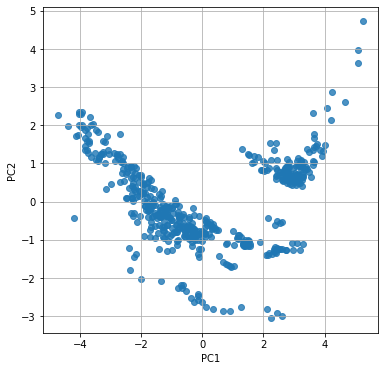

In [ ]:
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

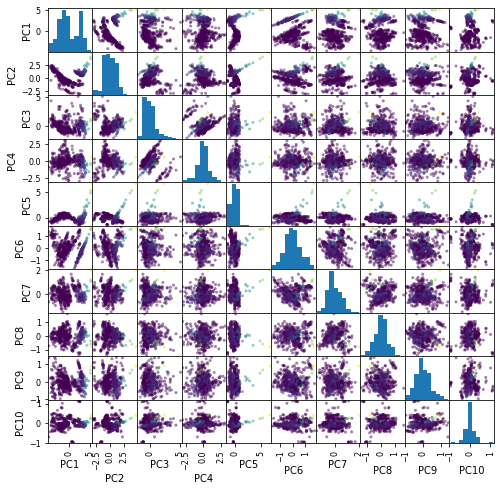

In [ ]:
from pandas import plotting 
plotting.scatter_matrix(pd.DataFrame(feature, 
                        columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]), 
                        figsize=(8, 8), c=list(df.iloc[:, 0]), alpha=0.5) 
plt.show()

In [ ]:
# 寄与率
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,0.514593
PC2,0.129377
PC3,0.104475
PC4,0.080131
PC5,0.053360
PC6,0.043227
PC7,0.028571
PC8,0.022076
PC9,0.017794
PC10,0.006395


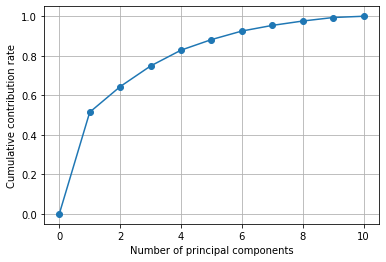

In [ ]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

In [ ]:
# PCA の固有値
pd.DataFrame(pca.explained_variance_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,5.156120
PC2,1.296334
PC3,1.046820
PC4,0.802899
PC5,0.534654
PC6,0.433125
PC7,0.286277
PC8,0.221201
PC9,0.178296
PC10,0.064076


In [ ]:
# PCA の固有ベクトル
pd.DataFrame(pca.components_, columns=df.columns[0:10], index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX
PC1,0.267876,-0.286016,0.383490,0.022079,0.388089,-0.181810,0.350917,-0.369479,0.346809,0.367808
PC2,0.440410,0.401289,-0.062792,-0.435732,-0.116405,-0.048566,-0.269766,0.285793,0.392180,0.356422
PC3,0.149711,0.278943,-0.047796,0.666717,0.046347,0.611204,-0.012067,-0.012327,0.233401,0.149962
PC4,-0.058283,-0.120797,-0.080262,-0.592071,0.060195,0.722435,0.197803,-0.239331,-0.015343,-0.053341
PC5,0.767935,-0.357230,-0.322109,0.092182,-0.218040,-0.011161,0.050123,-0.097127,-0.127342,-0.307544
PC6,0.223639,0.670697,0.021564,-0.060927,0.293778,-0.118860,0.465697,-0.078126,-0.353233,-0.218609
PC7,0.218093,0.062743,0.583033,-0.031605,0.124187,0.128496,-0.623512,-0.248739,-0.329694,-0.127680
PC8,-0.082465,0.054041,-0.575931,-0.011931,0.574952,-0.131120,-0.395083,-0.352424,0.150792,-0.087449
PC9,0.109048,-0.269089,0.068362,-0.011449,0.591038,0.142302,0.000815,0.722930,-0.084259,-0.107662
PC10,0.049763,-0.089706,-0.244437,0.033294,0.030012,0.029962,-0.023816,-0.011735,-0.625845,0.731049


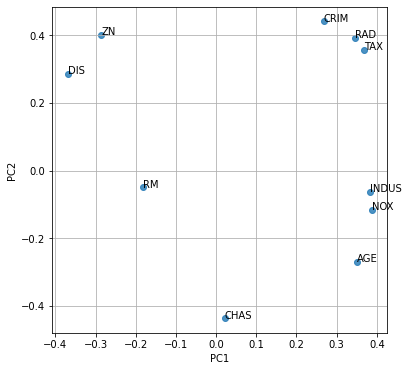

In [ ]:
# 第一主成分と第二主成分における観測変数の寄与度をプロットする
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], df.columns[0:10]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28, 28))
test_images = test_images.reshape((10000, 28, 28))

# ピクセルの値を 0~1 の間に正規化
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
train_images.shape

(60000, 28, 28)

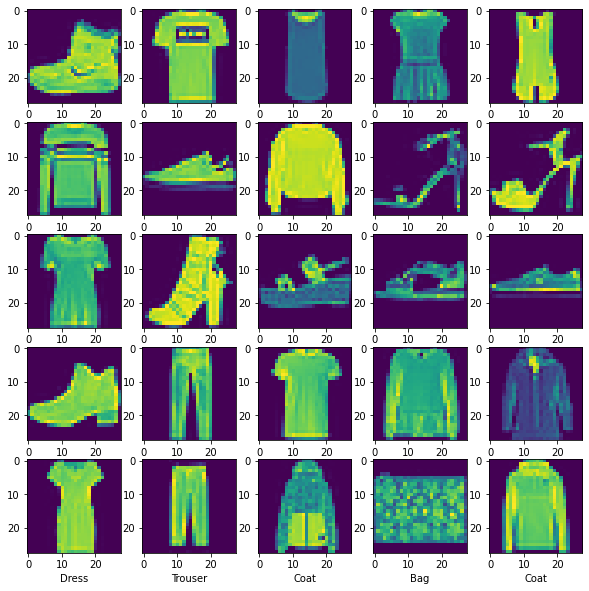

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    #plt.xticks([])
    #plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 62s 32ms/step - loss: 0.5113 - accuracy: 0.8114
Epoch 2/5
1875/1875 [==============================] - 59s 32ms/step - loss: 0.3294 - accuracy: 0.8791
Epoch 3/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2815 - accuracy: 0.8967
Epoch 4/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.2502 - accuracy: 0.9078
Epoch 5/5
1875/1875 [==============================] - 59s 32ms/step - loss: 0.2275 - accuracy: 0.9157
